<a href="https://colab.research.google.com/github/Jorge-89/Regresion-Lineal-/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Analisis-espacial-en-Python-COVID-19/Jorge-89-/-Analisis-espacial-en-Python-COVID-19/base_datos_estaciones_met_V3.csv'
df = pd.read_csv(url, sep=";")
df.columns

Index(['fecha_completa', 'Fecha', 'Hora', 'Temp_Alicia AgriculturaCba',
       'Humedad_Alicia AgriculturaCba', 'PP_Alicia AgriculturaCba',
       'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
       'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
modelo= Pipeline([
                    ('features', PolynomialFeatures()),
                     ('model',Lasso())
])

grilla = GridSearchCV(modelo,
                      {'model__alpha':[1, 0.1, 0.01, 0.001, 0.0001], 'features__degree':[1,2,3,4]},
                      cv = 5, scoring="neg_mean_squared_error", verbose=3
                      )
grilla.fit(x_train,y_train)






Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] features__degree=1, model__alpha=1 ..............................
[CV] . features__degree=1, model__alpha=1, score=-0.674, total=   0.1s
[CV] features__degree=1, model__alpha=1 ..............................
[CV] . features__degree=1, model__alpha=1, score=-0.721, total=   0.1s
[CV] features__degree=1, model__alpha=1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] . features__degree=1, model__alpha=1, score=-0.731, total=   0.1s
[CV] features__degree=1, model__alpha=1 ..............................
[CV] . features__degree=1, model__alpha=1, score=-0.706, total=   0.1s
[CV] features__degree=1, model__alpha=1 ..............................
[CV] . features__degree=1, model__alpha=1, score=-0.720, total=   0.1s
[CV] features__degree=1, model__alpha=0.1 ............................
[CV]  features__degree=1, model__alpha=0.1, score=-0.621, total=   0.1s
[CV] features__degree=1, model__alpha=0.1 ............................
[CV]  features__degree=1, model__alpha=0.1, score=-0.654, total=   0.1s
[CV] features__degree=1, model__alpha=0.1 ............................
[CV]  features__degree=1, model__alpha=0.1, score=-0.636, total=   0.0s
[CV] features__degree=1, model__alpha=0.1 ............................
[CV]  features__degree=1, model__alpha=0.1, score=-0.615, total=   0.0s
[CV] features__degree=1, model__alpha=0.1 ............................
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.30702231361283, tolerance: 27.852036443211947
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.1195997695786, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=1, model__alpha=0.001, score=-0.648, total=   0.1s
[CV] features__degree=1, model__alpha=0.001 ..........................
[CV]  features__degree=1, model__alpha=0.001, score=-0.627, total=   0.1s
[CV] features__degree=1, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.6982621349116, tolerance: 27.993720029901144
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.33382348808027, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=1, model__alpha=0.001, score=-0.608, total=   0.2s
[CV] features__degree=1, model__alpha=0.001 ..........................
[CV]  features__degree=1, model__alpha=0.001, score=-0.633, total=   0.1s
[CV] features__degree=1, model__alpha=0.0001 .........................
[CV]  features__degree=1, model__alpha=0.0001, score=-0.616, total=   0.1s
[CV] features__degree=1, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.20218087037392, tolerance: 28.00070268643761
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917.9938123114694, tolerance: 27.852036443211947
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.8911230177239, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=1, model__alpha=0.0001, score=-0.648, total=   0.1s
[CV] features__degree=1, model__alpha=0.0001 .........................
[CV]  features__degree=1, model__alpha=0.0001, score=-0.627, total=   0.1s
[CV] features__degree=1, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1019.5104936985117, tolerance: 27.993720029901144
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897.3015730484958, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=1, model__alpha=0.0001, score=-0.608, total=   0.1s
[CV] features__degree=1, model__alpha=0.0001 .........................
[CV]  features__degree=1, model__alpha=0.0001, score=-0.633, total=   0.2s
[CV] features__degree=2, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921.4196828357553, tolerance: 28.00070268643761
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858.963717779703, tolerance: 27.852036443211947
  positive)


[CV] . features__degree=2, model__alpha=1, score=-0.697, total=   0.4s
[CV] features__degree=2, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1273.0566979136293, tolerance: 28.044675499879396
  positive)


[CV] . features__degree=2, model__alpha=1, score=-0.734, total=   0.3s
[CV] features__degree=2, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.9196051580993, tolerance: 27.993720029901144
  positive)


[CV] . features__degree=2, model__alpha=1, score=-0.742, total=   0.3s
[CV] features__degree=2, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268.005071115806, tolerance: 27.738678962748633
  positive)


[CV] . features__degree=2, model__alpha=1, score=-0.715, total=   0.3s
[CV] features__degree=2, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1252.4884734495167, tolerance: 28.00070268643761
  positive)


[CV] . features__degree=2, model__alpha=1, score=-0.751, total=   0.3s
[CV] features__degree=2, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2386.4471724203727, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=2, model__alpha=0.1, score=-0.615, total=   0.3s
[CV] features__degree=2, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2440.7588096765357, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=2, model__alpha=0.1, score=-0.645, total=   0.4s
[CV] features__degree=2, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2479.2128668419996, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=2, model__alpha=0.1, score=-0.639, total=   0.4s
[CV] features__degree=2, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465.5957045303226, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=2, model__alpha=0.1, score=-0.613, total=   0.3s
[CV] features__degree=2, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2461.7102769108355, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=2, model__alpha=0.1, score=-0.647, total=   0.3s
[CV] features__degree=2, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2558.437528548744, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=2, model__alpha=0.01, score=-0.595, total=   0.4s
[CV] features__degree=2, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2526.7485309895524, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=2, model__alpha=0.01, score=-0.626, total=   0.4s
[CV] features__degree=2, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2536.951342102585, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=2, model__alpha=0.01, score=-0.612, total=   0.4s
[CV] features__degree=2, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2556.815647762824, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=2, model__alpha=0.01, score=-0.591, total=   0.4s
[CV] features__degree=2, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2531.5474218532986, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=2, model__alpha=0.01, score=-0.619, total=   0.4s
[CV] features__degree=2, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2522.5838132366775, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=2, model__alpha=0.001, score=-0.593, total=   0.4s
[CV] features__degree=2, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2491.339859140583, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=2, model__alpha=0.001, score=-0.623, total=   0.4s
[CV] features__degree=2, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2506.5771633176532, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=2, model__alpha=0.001, score=-0.610, total=   0.4s
[CV] features__degree=2, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2526.5896075979285, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=2, model__alpha=0.001, score=-0.590, total=   0.4s
[CV] features__degree=2, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2500.5319251241385, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=2, model__alpha=0.001, score=-0.616, total=   0.5s
[CV] features__degree=2, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2516.289385761464, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=2, model__alpha=0.0001, score=-0.593, total=   0.5s
[CV] features__degree=2, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2485.021948284905, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=2, model__alpha=0.0001, score=-0.623, total=   0.4s
[CV] features__degree=2, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2500.577544419544, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=2, model__alpha=0.0001, score=-0.610, total=   0.4s
[CV] features__degree=2, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2520.118815049137, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=2, model__alpha=0.0001, score=-0.590, total=   0.4s
[CV] features__degree=2, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2494.3785486186734, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=2, model__alpha=0.0001, score=-0.616, total=   0.5s
[CV] features__degree=3, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2644.438686792163, tolerance: 27.852036443211947
  positive)


[CV] . features__degree=3, model__alpha=1, score=-0.578, total=   1.9s
[CV] features__degree=3, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2618.556622984855, tolerance: 28.044675499879396
  positive)


[CV] . features__degree=3, model__alpha=1, score=-0.607, total=   1.7s
[CV] features__degree=3, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2622.0421658971018, tolerance: 27.993720029901144
  positive)


[CV] . features__degree=3, model__alpha=1, score=-0.598, total=   1.8s
[CV] features__degree=3, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2646.9757704429985, tolerance: 27.738678962748633
  positive)


[CV] . features__degree=3, model__alpha=1, score=-0.571, total=   1.8s
[CV] features__degree=3, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2624.6942079150863, tolerance: 28.00070268643761
  positive)


[CV] . features__degree=3, model__alpha=1, score=-0.600, total=   1.9s
[CV] features__degree=3, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2522.598160380553, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=3, model__alpha=0.1, score=-0.570, total=   1.5s
[CV] features__degree=3, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2488.3185411332497, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=3, model__alpha=0.1, score=-0.599, total=   1.5s
[CV] features__degree=3, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2496.2728410697496, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=3, model__alpha=0.1, score=-0.592, total=   1.6s
[CV] features__degree=3, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2519.6069343606646, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=3, model__alpha=0.1, score=-0.568, total=   1.5s
[CV] features__degree=3, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2497.9130928335294, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=3, model__alpha=0.1, score=-0.592, total=   1.5s
[CV] features__degree=3, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2458.6600334361733, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=3, model__alpha=0.01, score=-0.569, total=   1.6s
[CV] features__degree=3, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2424.7898422259177, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=3, model__alpha=0.01, score=-0.598, total=   1.4s
[CV] features__degree=3, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2437.209457484076, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=3, model__alpha=0.01, score=-0.587, total=   1.4s
[CV] features__degree=3, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2459.0741474190186, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=3, model__alpha=0.01, score=-0.565, total=   1.5s
[CV] features__degree=3, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2433.60131320926, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=3, model__alpha=0.01, score=-0.589, total=   1.5s
[CV] features__degree=3, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2411.689115840795, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=3, model__alpha=0.001, score=-0.569, total=   1.5s
[CV] features__degree=3, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2376.268640884036, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=3, model__alpha=0.001, score=-0.599, total=   1.5s
[CV] features__degree=3, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2390.8998070344987, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=3, model__alpha=0.001, score=-0.586, total=   1.5s
[CV] features__degree=3, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2412.172639771423, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=3, model__alpha=0.001, score=-0.565, total=   1.5s
[CV] features__degree=3, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2387.379637353792, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=3, model__alpha=0.001, score=-0.588, total=   1.5s
[CV] features__degree=3, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2404.935861911112, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=3, model__alpha=0.0001, score=-0.569, total=   1.5s
[CV] features__degree=3, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2369.3366457044167, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=3, model__alpha=0.0001, score=-0.599, total=   1.5s
[CV] features__degree=3, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2384.1003674705225, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=3, model__alpha=0.0001, score=-0.586, total=   1.5s
[CV] features__degree=3, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2405.35628997472, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=3, model__alpha=0.0001, score=-0.565, total=   1.4s
[CV] features__degree=3, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2380.798083073945, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=3, model__alpha=0.0001, score=-0.588, total=   1.5s
[CV] features__degree=4, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2545.5517628370226, tolerance: 27.852036443211947
  positive)


[CV] . features__degree=4, model__alpha=1, score=-0.554, total=   5.4s
[CV] features__degree=4, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2508.1081950579755, tolerance: 28.044675499879396
  positive)


[CV] . features__degree=4, model__alpha=1, score=-0.588, total=   5.3s
[CV] features__degree=4, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2522.289134033614, tolerance: 27.993720029901144
  positive)


[CV] . features__degree=4, model__alpha=1, score=-0.572, total=   5.3s
[CV] features__degree=4, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2548.0009656497996, tolerance: 27.738678962748633
  positive)


[CV] . features__degree=4, model__alpha=1, score=-0.548, total=   5.3s
[CV] features__degree=4, model__alpha=1 ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2516.4443647209787, tolerance: 28.00070268643761
  positive)


[CV] . features__degree=4, model__alpha=1, score=-0.575, total=   5.4s
[CV] features__degree=4, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2432.153206293993, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=4, model__alpha=0.1, score=-0.552, total=   5.4s
[CV] features__degree=4, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2392.878856476544, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=4, model__alpha=0.1, score=-0.587, total=   5.5s
[CV] features__degree=4, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2408.6668721707015, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=4, model__alpha=0.1, score=-0.573, total=   5.5s
[CV] features__degree=4, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2435.1792706696547, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=4, model__alpha=0.1, score=-0.549, total=   5.4s
[CV] features__degree=4, model__alpha=0.1 ............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407.8139255234723, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=4, model__alpha=0.1, score=-0.572, total=   5.4s
[CV] features__degree=4, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2383.198735366009, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=4, model__alpha=0.01, score=-0.552, total=   5.5s
[CV] features__degree=4, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2345.0443733206353, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=4, model__alpha=0.01, score=-0.587, total=   5.5s
[CV] features__degree=4, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2364.791389629637, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=4, model__alpha=0.01, score=-0.571, total=   5.5s
[CV] features__degree=4, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2388.1267004794076, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=4, model__alpha=0.01, score=-0.548, total=   5.5s
[CV] features__degree=4, model__alpha=0.01 ...........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2359.8578120524794, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=4, model__alpha=0.01, score=-0.572, total=   5.5s
[CV] features__degree=4, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2333.7674814071456, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=4, model__alpha=0.001, score=-0.552, total=   5.6s
[CV] features__degree=4, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2294.734434852744, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=4, model__alpha=0.001, score=-0.587, total=   5.5s
[CV] features__degree=4, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2316.056274784945, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=4, model__alpha=0.001, score=-0.570, total=   5.4s
[CV] features__degree=4, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2339.8183326087624, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=4, model__alpha=0.001, score=-0.548, total=   6.3s
[CV] features__degree=4, model__alpha=0.001 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2311.7181539188437, tolerance: 28.00070268643761
  positive)


[CV]  features__degree=4, model__alpha=0.001, score=-0.571, total=   6.5s
[CV] features__degree=4, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2326.8193784914693, tolerance: 27.852036443211947
  positive)


[CV]  features__degree=4, model__alpha=0.0001, score=-0.552, total=   6.6s
[CV] features__degree=4, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2287.650746857897, tolerance: 28.044675499879396
  positive)


[CV]  features__degree=4, model__alpha=0.0001, score=-0.587, total=   6.2s
[CV] features__degree=4, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2309.117962400514, tolerance: 27.993720029901144
  positive)


[CV]  features__degree=4, model__alpha=0.0001, score=-0.570, total=   5.9s
[CV] features__degree=4, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2332.6952438303197, tolerance: 27.738678962748633
  positive)


[CV]  features__degree=4, model__alpha=0.0001, score=-0.548, total=   6.7s
[CV] features__degree=4, model__alpha=0.0001 .........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2304.9050981837117, tolerance: 28.00070268643761
  positive)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished


[CV]  features__degree=4, model__alpha=0.0001, score=-0.571, total=   6.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2903.6538469351776, tolerance: 34.908284277391985
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
            

In [ ]:
grilla.best_params_

{'features__degree': 4, 'model__alpha': 0.001}

1 0.7104648035226953
1 0.632607455121245
1 0.6263966674939698
1 0.6263074550849667
1 0.626306019196963
2 0.7277680247164683
2 0.631820557610203
2 0.6086078210490433
2 0.6064870575408067
2 0.6064039584965173
3 0.5907199268045777
3 0.5841626256661375
3 0.5816679637731141
3 0.581311323636876
3 0.5813249443749158
4 0.5673700345833128
4 0.566616796856059
4 0.5659431760728034
4 0.5657080290215505
4 0.5657220626501501


Text(0, 0.5, 'RMSE en validacion')

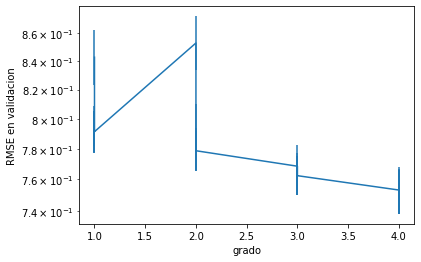

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')


In [ ]:
grilla.cv_results_['mean_test_score']

array([-0.7104648 , -0.63260746, -0.62639667, -0.62630746, -0.62630602,
       -0.72776802, -0.63182056, -0.60860782, -0.60648706, -0.60640396,
       -0.59071993, -0.58416263, -0.58166796, -0.58131132, -0.58132494,
       -0.56737003, -0.5666168 , -0.56594318, -0.56570803, -0.56572206])

In [ ]:
grilla.best_score_

-0.5657080290215505

In [ ]:
modelo=Pipeline([['poly',PolynomialFeatures(degree=4,include_bias=True)],['regressor',Lasso(fit_intercept=True,alpha=0.001)]])
#entreno el modelo de grado 6 con los datos de entrenamiento, ya que fue el mejor grado encontrado 
modelo.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2903.6538469351776, tolerance: 34.908284277391985
  positive)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False)]],
         verbose=False)

In [ ]:
print(modelo['regressor'].coef_)
print(modelo['regressor'].intercept_)

[ 0.00000000e+00  7.25003510e-01 -7.81153582e-04 -1.41456439e-04
 -9.67552217e-03  1.30789343e-01  2.63718967e-02  1.93986857e-02
  8.30491498e-04 -4.79789808e-04  4.25951388e-05  8.28065470e-06
  1.05523044e-03  2.06864687e-03 -1.40524637e-03 -1.15096267e-03
  1.24616979e-06  2.12345617e-04  1.00471841e-03 -1.92762008e-04
  2.27810650e-03 -5.83437579e-05 -1.03916200e-04 -4.99197296e-05
 -1.52824397e-03 -2.86012874e-03  1.99589617e-03  7.05126198e-04
 -2.77391812e-04 -7.41260787e-04  1.18600156e-04  1.53932086e-03
 -8.69117987e-05 -3.24028869e-05  1.72311617e-06  2.06696300e-03
 -4.67596842e-04 -1.33947359e-03 -4.98069017e-04  1.22717031e-04
  6.37713307e-04 -1.74905011e-05  7.92443865e-04 -1.47403467e-04
  9.51445935e-05 -3.54432238e-05 -2.74380777e-05  2.88528356e-05
  3.40001319e-05 -1.34213592e-06 -5.25989451e-05  2.67605264e-05
  3.15200521e-06  1.75924809e-06 -3.80370079e-06 -1.40446160e-06
  3.87158234e-05 -6.00998099e-06 -2.77004079e-05 -2.66820936e-06
 -3.17882044e-05  1.49315

In [ ]:
y_pred_test = modelo.predict(x_test)
y_pred_test

array([27.71752245, 30.25637159, 20.27584909, ..., 23.80697023,
       15.55783262, 22.66760888])

In [ ]:
y_test

6407     28.0
6301     30.6
304      20.1
12520    14.6
2417     26.6
         ... 
7514     18.9
4874     22.4
2372     23.0
8106     14.8
4115     22.1
Name: Temp_Alicia AgriculturaCba, Length: 2592, dtype: float64

In [ ]:

print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared=True)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.5943493167857362


In [ ]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

#X, y = make_regression(random_state=42)

pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(),  Ridge())

pipe
# Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
#                 ('polynomialfeatures', PolynomialFeatures()),
#                 ('ridge', Ridge())])

gs = GridSearchCV(pipe, param_grid={'polynomialfeatures__degree': [2,4],
                                    'ridge__alpha': [1,10]}).fit(x_train, y_train)

# gs.best_params_
# {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

In [ ]:
gs.best_params_
# {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

{'polynomialfeatures__degree': 4, 'ridge__alpha': 1}

In [ ]:
grilla.best_params_

{'features__degree': 3}

In [ ]:
gs.best_score_

0.9829233354151817

In [ ]:
importance = np.abs(coefficients)
importance

array([0.00000000e+00, 0.00000000e+00, 1.36808633e-01, 0.00000000e+00,
       3.43157206e-02, 0.00000000e+00, 1.88523728e-02, 0.00000000e+00,
       4.41999329e-04, 7.01340383e-03, 4.03848215e-04, 1.24727257e-03,
       1.38231478e-03, 8.33244628e-04, 3.63614477e-04, 0.00000000e+00,
       0.00000000e+00, 4.07643648e-04, 2.82110748e-03, 3.03107128e-04,
       0.00000000e+00, 6.27111099e-05, 3.63310124e-03, 1.82118181e-04,
       1.02723826e-03, 1.85210680e-03, 7.99940158e-04, 0.00000000e+00,
       0.00000000e+00, 6.36500943e-04, 2.62407851e-04, 7.78011220e-07,
       1.23580936e-04, 3.40385234e-04, 8.81449219e-05, 1.97776847e-03,
       4.60524240e-04, 0.00000000e+00, 0.00000000e+00, 1.62249067e-04,
       1.26676589e-03, 1.71132977e-05, 4.76559176e-04, 0.00000000e+00,
       5.23435393e-05])

In [ ]:
from sklearn.preprocessing import StandardScaler
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

NameError: ignored

In [ ]:
modelo=Pipeline([['poly',PolynomialFeatures(degree=3,include_bias=True)],['regressor',LinearRegression(fit_intercept=True)]])
#entreno el modelo de grado 3 con los datos de entrenamiento, ya que fue el mejor grado encontrado 
modelo.fit(x_train,y_train)